In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

raw_data=pd.read_excel(r'C:\Users\shqkd\Desktop\dpl\titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


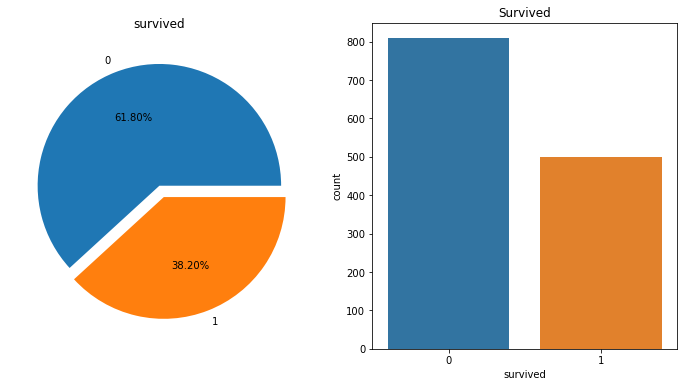

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

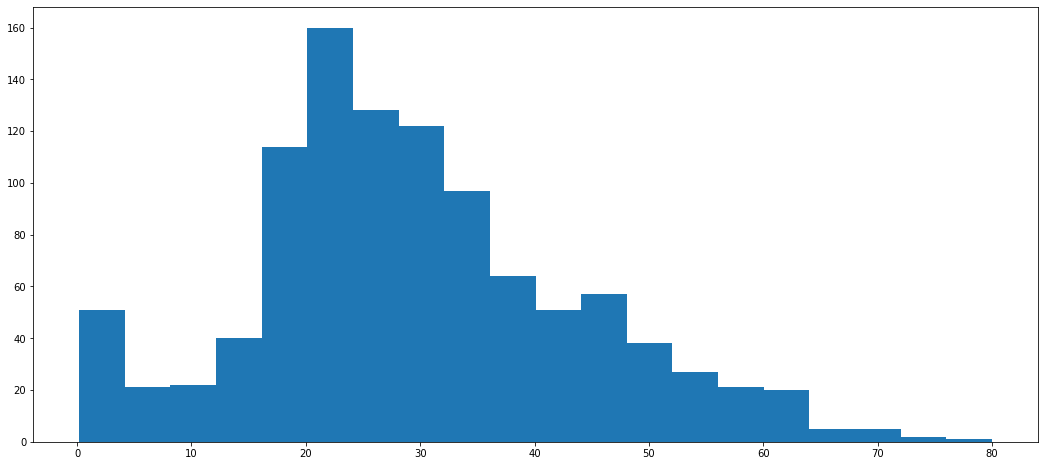

In [8]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [9]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [10]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


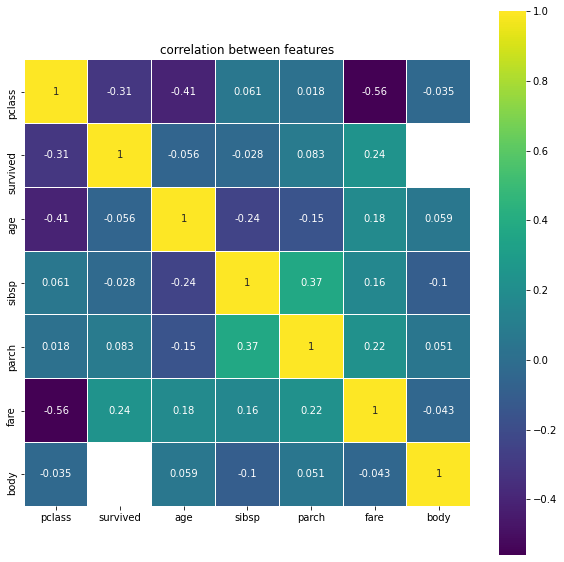

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(),linewidths=0.01,square=True,
           annot=True,cmap=plt.cm.viridis,linecolor="white")
plt.title('correlation between features')
plt.show()